In [30]:
import pandas as pd 
import numpy as np

In [31]:
ds = pd.read_csv("nurserynew.csv")

In [32]:
ds.head()

,parents,has_nurs,form_st,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [33]:
l = list(ds.columns)
l


['parents',
 'has_nurs',
 'form_st',
 'children',
 'housing',
 'finance',
 'social',
 'health',
 'target']

In [34]:
for i in l:
    print("******** Column ",i,"***********")
    print(ds[i].value_counts())
    print() 

******** Column  parents ***********
usual          4320
pretentious    4320
great_pret     4320
Name: parents, dtype: int64

******** Column  has_nurs ***********
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: has_nurs, dtype: int64

******** Column  form_st ***********
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: form_st, dtype: int64

******** Column  children ***********
1       3240
2       3240
3       3240
more    3240
Name: children, dtype: int64

******** Column  housing ***********
convenient    4320
less_conv     4320
critical      4320
Name: housing, dtype: int64

******** Column  finance ***********
convenient    6480
inconv        6480
Name: finance, dtype: int64

******** Column  social ***********
nonprob          4320
slightly_prob    4320
problematic      4320
Name: social, dtype: int64

******** Column  health ***********
recommended    4320
priority       4320
not_recom  

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le_parents = LabelEncoder()
le_has_nurs = LabelEncoder()
le_form_st  = LabelEncoder()
le_children  = LabelEncoder()
# le_housing = LabelEncoder()
# le_finance = LabelEncoder()
le_social = LabelEncoder()
# le_health = LabelEncoder()
# le_target = LabelEncoder()

In [37]:
ds['parents_n'] = le_parents.fit_transform(ds['parents'])
ds['has_nurs_n'] = le_has_nurs.fit_transform(ds['has_nurs'])
ds['form_st_n'] = le_form_st.fit_transform(ds['form_st'])
ds['children_n'] = le_children.fit_transform(ds['children'])
# ds['housing_n'] = le_housing.fit_transform(ds['housing'])
# ds['finance_n'] = le_finance.fit_transform(ds['finance'])
ds['social_n'] = le_social.fit_transform(ds['social'])
# ds['health_n'] = le_health.fit_transform(ds['health'])
# ds['target_n'] = le_target.fit_transform(ds['target'])
ds.head()

,parents,has_nurs,form_st,children,housing,finance,social,health,target,parents_n,has_nurs_n,form_st_n,children_n,social_n
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,2,3,0,0,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,2,3,0,0,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2,3,0,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,2,3,0,0,2
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,2,3,0,0,2


In [38]:
le_housing = LabelEncoder()
le_health = LabelEncoder()
le_finance = LabelEncoder()

In [39]:
ds['housing_n'] = le_housing.fit_transform(ds['housing'])
ds['health_n'] = le_health.fit_transform(ds['health'])
ds['finance_n'] = le_finance.fit_transform(ds['finance'])
ds.head()

,parents,has_nurs,form_st,children,housing,finance,social,health,target,parents_n,has_nurs_n,form_st_n,children_n,social_n,housing_n,health_n,finance_n
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,2,3,0,0,0,0,2,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,2,3,0,0,0,0,1,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2,3,0,0,0,0,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,2,3,0,0,2,0,2,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,2,3,0,0,2,0,1,0


In [40]:
ds.dtypes

parents       object
has_nurs      object
form_st       object
children      object
housing       object
finance       object
social        object
health        object
target        object
parents_n      int32
has_nurs_n     int32
form_st_n      int32
children_n     int32
social_n       int32
housing_n      int32
health_n       int32
finance_n      int32
dtype: object

In [41]:
x = ds.drop(['parents','has_nurs','form_st','children','social','health','housing','finance','target'], axis=1)
y = ds['target']
x

,parents_n,has_nurs_n,form_st_n,children_n,social_n,housing_n,health_n,finance_n
0,2,3,0,0,0,0,2,0
1,2,3,0,0,0,0,1,0
2,2,3,0,0,0,0,0,0
3,2,3,0,0,2,0,2,0
4,2,3,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...
12955,0,4,2,3,2,1,1,1
12956,0,4,2,3,2,1,0,1
12957,0,4,2,3,1,1,2,1
12958,0,4,2,3,1,1,1,1


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
len(x_train)

9072

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [44]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.6540637860082305


In [45]:
from sklearn.tree import DecisionTreeClassifier #for checking testing results

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (10368, 8)
Testing split input-  (2592, 8)


In [47]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [48]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_train, y_train)

1.0

In [49]:
# Predicting the values of test data
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       870
    priority       0.99      0.99      0.99       873
   recommend       0.00      0.00      0.00         2
  spec_prior       1.00      0.99      1.00       785
  very_recom       0.93      1.00      0.96        62

    accuracy                           1.00      2592
   macro avg       0.78      0.80      0.79      2592
weighted avg       0.99      1.00      1.00      2592



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Score: 0.9953703703703703')

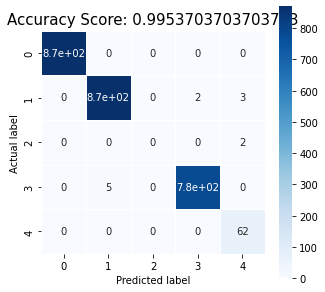

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.datasets import load_digits

In [53]:
rf = RandomForestClassifier(n_estimators=10, max_depth = 6)

In [54]:
digits = load_digits()

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target)

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10)

In [57]:
rf.score(X_test,y_test)

0.92

In [58]:
rf.score(X_train,y_train)

0.9665924276169265

In [ ]:
# Predicting the values of test data
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

ValueError: Found input variables with inconsistent numbers of samples: [450, 2592]